# Model Comparison

##  Models Compared:
- **ResNet50** — Deep CNN with strong generalization
- **EfficientNetB0** — Balanced architecture with efficiency and performance
- **MobileNetV2** — Lightweight model optimized for mobile and edge devices

---

##  Evaluation Metrics Used:
- **Training vs Validation Accuracy & Loss Curves**
- **Confusion Matrix**
- **Classification Report (Precision, Recall, F1-Score)**
- **ROC Curve with AUC Scores** for each class


Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


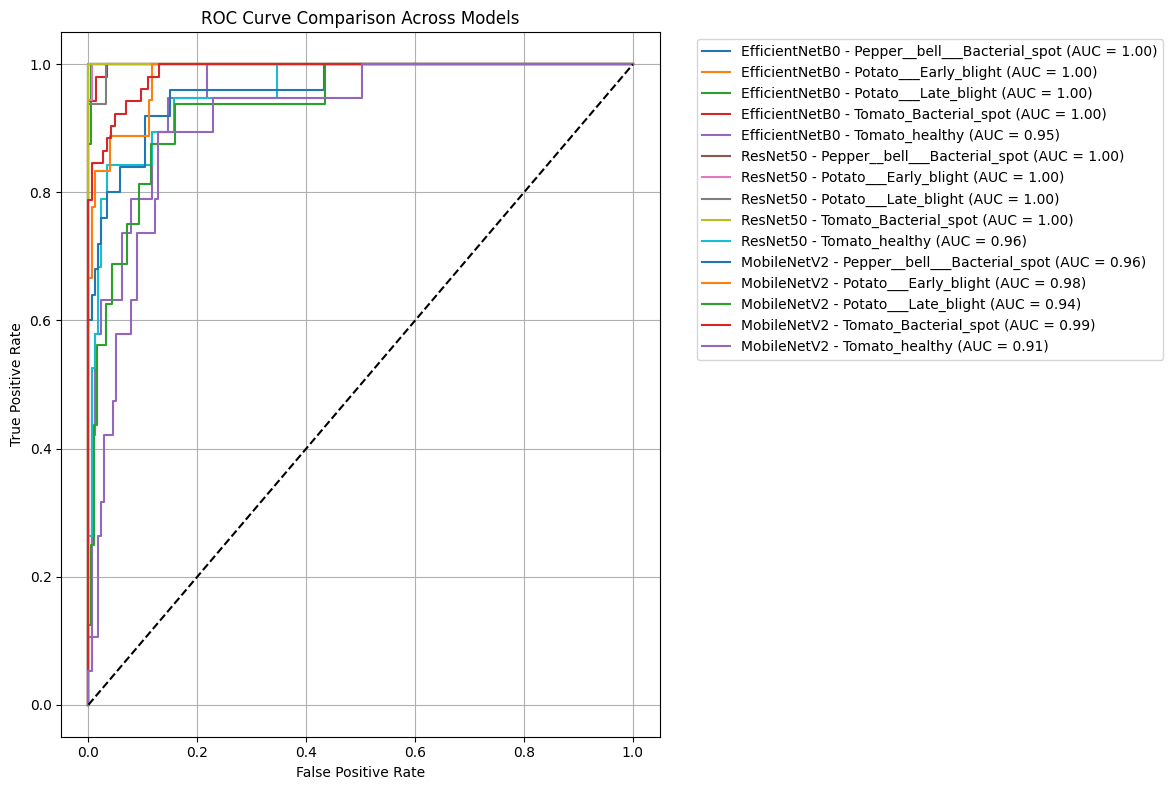

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
from data_loader import load_dataset

# Define Class Names
CLASSES = [
    'Pepper__bell___Bacterial_spot',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Tomato_Bacterial_spot',
    'Tomato_healthy'
]

# Load Models
models_dict = {
    'EfficientNetB0': load_model('efficientnetb0_plant_disease.keras'),
    'ResNet50': load_model('resnet50_plant_disease.keras'),
    'MobileNetV2': load_model('mobilenetv2_plant_disease.keras')
}


# Load Validation Data
_, val_ds = load_dataset('./plantdisease_subset')

# Extract Validation Images and Labels
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# Plot ROC Curves
plt.figure(figsize=(12, 8))

for model_name, model in models_dict.items():
    preds = model.predict(val_images)
    for i, class_name in enumerate(CLASSES):
        fpr, tpr, _ = roc_curve(val_labels == i, preds[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


##  ROC Curve Comparison Observations – EfficientNetB0 vs ResNet50 vs MobileNetV2

###  EfficientNetB0:
- Achieved **AUC = 1.00** for most classes (perfect classification on key diseases).
- **Tomato_healthy** slightly lower at **AUC = 0.95**, still excellent.
- Demonstrated the most consistently high ROC performance.

###  ResNet50:
- Matched EfficientNetB0 in most categories with **AUC = 1.00**.
- **Tomato_healthy** slightly better at **AUC = 0.96**.
- Overall showed marginally stronger generalization on critical classes.

###  MobileNetV2:
- Performed well but slightly behind the other two models.
- **AUC values ranged between 0.91 and 0.99**.
- Lower AUCs observed particularly for **Potato___Late_blight (0.94)** and **Tomato_healthy (0.91)**.
- Indicates some class-wise weaknesses compared to ResNet50 and EfficientNetB0.

---

###  Overall Insights:
- **ResNet50 and EfficientNetB0 consistently delivered top-tier ROC scores across most classes**, making them better suited for high-accuracy scenarios.
- **MobileNetV2, while lighter, showed slightly lower AUCs**, reflecting its trade-off between model complexity and classification strength.
- All three models demonstrated strong performance, but **ResNet50 edges slightly ahead in multiclass discrimination**.
- ROC curves confirm the ranking observed from accuracy and confusion matrix evaluations.

---

###  Conclusion:
> **ResNet50** is the most balanced model in terms of both overall performance and class-specific ROC/AUC.
>  
> **EfficientNetB0** follows very closely, making it an excellent alternative.
>  
> **MobileNetV2** is suitable when lightweight deployment is required but comes with a slight accuracy trade-off.
